Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Базовая подготовка данных перед векторизацией

In [2]:
# чтение очищенных данных, подготовленных скриптом очистки
train_df = pd.read_csv("data/preprocessed/clean_train.csv", sep=";")
test_df = pd.read_csv("data/preprocessed/clean_test.csv", sep=";")

Блок преобразования текста в векторы (числовые признаки) для классической ML-модели

In [3]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000, min_df=2)
X_train = vectorizer.fit_transform(train_df["message"])
X_test = vectorizer.transform(test_df["message"])
y_train = train_df["is_toxic"]
y_test = test_df["is_toxic"]

Блок обучения классификатора логистической регрессии

In [4]:
model = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Блок для выполнения инференса модели логистической регрессии и получения финальных предсказаний,
определяющих, какие комментарии модель относит к “токсичным”, а какие — к “нетоксичным”.

In [5]:
pred = model.predict(X_test)

Оценка качества модели и визуализация результатов классификации

              precision    recall  f1-score   support

           0      0.930     0.899     0.915       119
           1      0.894     0.927     0.910       109

    accuracy                          0.912       228
   macro avg      0.912     0.913     0.912       228
weighted avg      0.913     0.912     0.912       228

F1-score: 0.91


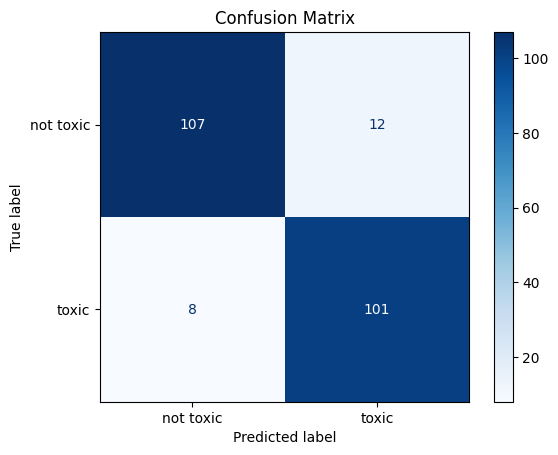

In [6]:
print(classification_report(y_test, pred, digits=3)) # текстовый отчёт по метрикам
print("F1-score:", round(f1_score(y_test, pred), 3)) # вычисление общей метрики качества

# матрица ошибок
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm, display_labels=["not toxic", "toxic"]).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Блок для извлечения весов финального классификатора логистической регрессии и аналитики,
какие слова и биграммы модель TF-IDF считает наиболее “токсичными” и “нетоксичными”.

In [7]:
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

top_positive = np.argsort(coefs)[-15:][::-1]
top_negative = np.argsort(coefs)[:15]

Вывод топа токсичных слов

In [8]:
print("Топ токсичных слов:")
for idx in top_positive:
    print(f"{feature_names[idx]:<25} {coefs[idx]:.3f}")

Топ токсичных слов:
ugly                      9.287
darn                      5.894
sucks                     5.104
crap                      5.091
hate                      4.990
damnit                    4.355
damni                     3.871
dammit                    3.586
damn                      3.445
suck                      3.424
screwedup                 3.412
crapi                     3.362
oh                        3.334
stupid                    3.084
awful                     2.980


Вывод топа нетоксичных слов

In [9]:
print("\nТоп нетоксичных слов:")
for idx in top_negative:
    print(f"{feature_names[idx]:<25} {coefs[idx]:.3f}")


Топ нетоксичных слов:
remove                    -4.036
kill                      -3.681
pid                       -3.504
question                  -3.373
self                      -3.371
should                    -3.278
die                       -2.966
nit                       -2.904
false                     -2.840
be                        -2.797
use                       -2.756
below                     -2.535
py                        -2.453
useless                   -2.375
by                        -2.336
